In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### `convertScaleAbs()` function

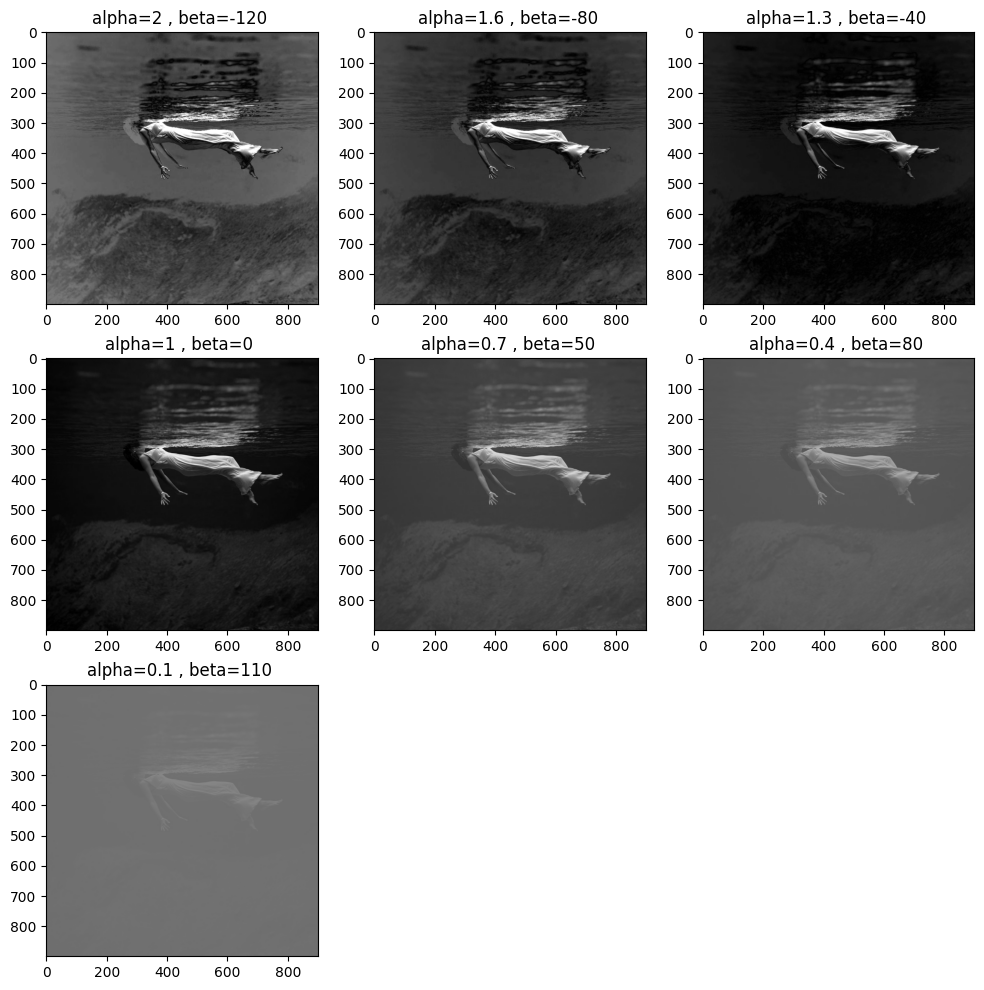

In [2]:
org_img = cv2.imread('media/images/Weeki_Wachee_spring.jpg')

state = 7
Alphas = [2,1.6,1.3,1,0.7,0.4,0.1]
Betas = [-120,-80,-40,0,50,80,110]

img_AB = np.zeros((state, org_img.shape[0], org_img.shape[1], org_img.shape[2]), 'uint8')

for i in range(0,state):
    img_AB[i] = cv2.add(img_AB[i] , cv2.convertScaleAbs(org_img, alpha = Alphas[i], beta = Betas[i]))
    
plt.figure(figsize=[12,12])
for i in range(0, state):
    plt.subplot(331+i); plt.imshow(img_AB[i][...,::-1]); plt.title('alpha={} , beta={} '.format(Alphas[i],Betas[i]));

### `gamma_correction`

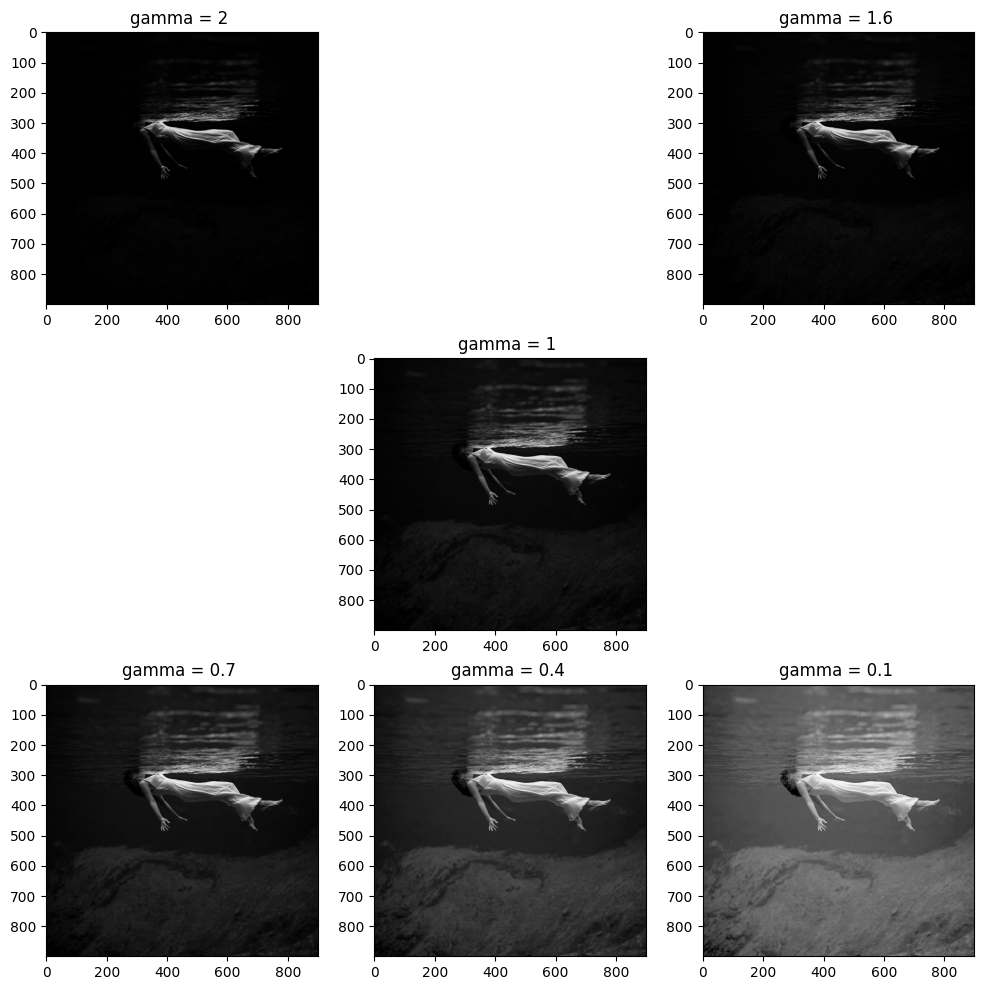

In [5]:
org_img = cv2.imread('media/images/Weeki_Wachee_spring.jpg')

state = 7
lut = np.empty((state,256), dtype='uint8')

gammas = [2,1.6,1.2,1,0.7,0.4,0.1]

for k in range(0,state):
    for i in range(0,256):
        lut[k,i] = np.clip(pow((i/255.0), gammas[k]) * 255 ,0, 255)
             
img_gamma_2 = cv2.LUT(org_img, lut[0]) 
img_gamma_1_6 = cv2.LUT(org_img, lut[1])
img_gamma_1 = cv2.LUT(org_img, lut[2])
img_gamma_0_7 = cv2.LUT(org_img, lut[3])
img_gamma_0_4 = cv2.LUT(org_img, lut[4])
img_gamma_0_1 = cv2.LUT(org_img, lut[5])

plt.figure(figsize=[12,12])
plt.subplot(331); plt.imshow(img_gamma_2[...,::-1]); plt.title('gamma = 2 ');
plt.subplot(333); plt.imshow(img_gamma_1_6[...,::-1]), plt.title('gamma = 1.6 ');
plt.subplot(335); plt.imshow(img_gamma_1[...,::-1]), plt.title('gamma = 1 ');
plt.subplot(337); plt.imshow(img_gamma_0_7[...,::-1]), plt.title('gamma = 0.7 ');
plt.subplot(338); plt.imshow(img_gamma_0_4[...,::-1]), plt.title('gamma = 0.4 ');
plt.subplot(330+9); plt.imshow(img_gamma_0_1[...,::-1]), plt.title('gamma = 0.1 ');

### Using Webcam

In [ ]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
shape = frame.shape
print("hight = {}, width = {}".format(shape[0], shape[1]))

In [ ]:
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 30
P07_cap = cv2.VideoWriter('P07.avi', fourcc, fps, (shape[1], shape[0]))
P07_cap_gamma = cv2.VideoWriter('P07_gamma.avi', fourcc, fps, (shape[1], shape[0]))



gamma = 0.7
lut = np.empty((256),dtype = np.uint8)
for i in range(256):
    lut[i] = np.clip(pow(i/255.0,gamma)*255,0,255)


    
while cap.isOpened():
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    
    P07_cap.write(frame)
    cv2.imshow('P07_out',frame)
    
    frame_gamma = cv2.LUT(frame, lut)
    P07_cap_gamma.write(frame_gamma)
    cv2.imshow('P07_gamma', frame_gamma)
    
    if cv2.waitKey(1) == ord('q'):
        break
        
cap.release() 
P07_cap.release()
P07_cap_gamma.release()

cv2.destroyAllWindows()